In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_excel('../data_to_model.xlsx')
columns = df.columns.tolist()
df.columns = ['col' + str(i+1) for i in range(len(df.columns))]
column_names = dict(zip(df.columns.tolist(), columns))
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64
0,24,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4,5,4,1,5,...,4,4,4,5,5,4,1,2,5,5
1,23,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3,3,3,0,3,...,4,3,4,4,4,4,4,3,4,3
2,25,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4,5,4,1,5,...,5,5,4,5,5,5,2,2,5,3
3,23,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4,3,4,0,4,...,4,5,5,5,5,5,3,3,3,3
4,23,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,5 y 7,0",4,4,4,1,5,...,4,5,5,5,5,5,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,21,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,5 y 7,0",4,3,4,1,4,...,4,4,5,5,4,4,3,2,3,4
316,20,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,0 y 6,4",3,5,5,1,4,...,4,1,1,5,1,2,3,2,5,4
317,22,Femenino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",3,3,3,0,3,...,1,1,1,2,1,1,4,5,4,3
318,27,Femenino,Subvencionado,Sobre 750,"Entre 6,5 y 7,0",5,5,5,1,5,...,5,5,5,5,5,5,5,5,5,5


In [3]:
df_demographic = df[df.columns[:5]]
df_control_a = df[df.columns[5:8]]
df_control_b = df[df.columns[8:10]]
df_control_d = df[df.columns[10:13]]
df_control_f = df[df.columns[13:23]]

# It seems to belong to another poll
df_demographic_2 = df[df.columns[23:26]]
df_open_answer = df[df.columns[26:29]]
df_control_g = df[df.columns[29:31]]

df_unknown = df[df.columns[31:33]]
df_control_e = df[df.columns[33:36]]
df_x_a = df[df.columns[36:43]]
df_x_b = df[df.columns[43:46]]
df_x_c = df[df.columns[46:52]]
df_x_d = df[df.columns[52:55]]
df_satisfaction = df[df.columns[55:60]]
df_relative_student = df[df.columns[60:]]

In [4]:
def text_var(df_eval):
    columns = ['C(' + col + ')' for col in df_eval.columns]
    text = '+'.join(columns)
    return text
print(text_var(df_x_c))

C(col47)+C(col48)+C(col49)+C(col50)+C(col51)+C(col52)


In [5]:
def text_ml(df, df_satisfaction, df_eval, index):
    columns = ['C(' + col + ')' for col in df_eval.columns]
    text = '+'.join(columns)
    return text
print(text_ml(df, df_satisfaction, df_control_a,4))
        
    

C(col6)+C(col7)+C(col8)


In [18]:
texto = text_var(df_demographic) # control g: pedir ayuda
model = sm.MixedLM.from_formula("col59 ~ " + texto,
                                groups="col24", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                  MixedLM     Dependent Variable:     col59    
No. Observations:       320         Method:                 REML     
No. Groups:             12          Scale:                  1.8576   
Min. group size:        3           Log-Likelihood:         -544.9038
Max. group size:        64          Converged:              Yes      
Mean group size:        26.7                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   4.299    0.776  5.539 0.000  2.778  5.820
C(col1)[T.19]              -0.195    0.395 -0.494 0.621 -0.969  0.579
C(col1)[T.20]              -0.332    0.478 -0.694 0.488 -1.270  0.606
C(col1)[T.21]              -0.542    0.468 -1.156 0.248 -1.460  0.376
C(col1)[T.22]              -0.194    0.451 -0.431 0.667 -1.077  0.689
C(col1)[T.23]              -0.359    0.479 -0.749 0.454 -1.297  0.579
C(col1)[T.24]              -0.516    0.464 -1.112 0.266 -1.426  0.394
C(col1)[T.25]              -0.778    0.663 -1.173 0.241 -2.077  0.522
C(col1)[T.26]              -0.941    0.619 -1.519 0.129 -2.154  0.273
C(col1)[T.27]              -0.749    0.626 -1.197 0.231 -1.975  0.477
C(col1)[T.28]               0.807    1.464  0.551 0.581 -2.062  3.677
C(col1)[T.29]               0.927    1.466  0.632 0.527 -1.947  3.801
C(col1)[T.30]               0.959    1.459  0.657 0.511 -1.901  3.819
C(col1)[T.31]              -2.890    1.506 -1.918 0.055 -5.842  0.063
C(col1)[T.47]               0.564    1.442  0.391 0.696 -2.262  3.390
C(col2)[T.Masculino]       -0.176    0.172 -1.027 0.304 -0.513  0.160
C(col2)[T.Otro]            -0.549    1.035 -0.531 0.596 -2.578  1.479
C(col3)[T.Particular]      -0.188    0.255 -0.738 0.461 -0.689  0.312
C(col3)[T.Subvencionado]   -0.012    0.221 -0.056 0.955 -0.446  0.421
C(col4)[T.Entre 500 y 550]  0.695    0.609  1.141 0.254 -0.499  1.888
C(col4)[T.Entre 551 y 600]  0.661    0.573  1.153 0.249 -0.463  1.785
C(col4)[T.Entre 601 y 650]  0.937    0.564  1.663 0.096 -0.168  2.042
C(col4)[T.Entre 651 y 700]  0.881    0.577  1.527 0.127 -0.250  2.011
C(col4)[T.Entre 701 y 750]  0.937    0.613  1.528 0.126 -0.265  2.140
C(col4)[T.Sobre 750]       -0.080    0.785 -0.102 0.918 -1.619  1.458
C(col5)[T.Entre 5,5 y 5,9] -0.685    0.400 -1.712 0.087 -1.470  0.099
C(col5)[T.Entre 6,0 y 6,4] -0.717    0.402 -1.783 0.075 -1.506  0.071
C(col5)[T.Entre 6,5 y 7,0] -0.582    0.436 -1.335 0.182 -1.437  0.272
col24 Var                   0.117    0.078                           
=====================================================================

"""

In [19]:
print(result.random_effects)

{'10°': col24    0.129337
dtype: float64, '11°': col24   -0.260343
dtype: float64, '12°': col24    0.34514
dtype: float64, '1°': col24    0.27202
dtype: float64, '2°': col24    0.033582
dtype: float64, '3°': col24   -0.110673
dtype: float64, '4°': col24   -0.096914
dtype: float64, '5°': col24   -0.46522
dtype: float64, '6°': col24    0.084789
dtype: float64, '7°': col24    0.106178
dtype: float64, '8°': col24    0.168006
dtype: float64, '9°': col24   -0.205901
dtype: float64}


In [8]:
column_names['col59']

'estoy satisfecho(a) con la edu'

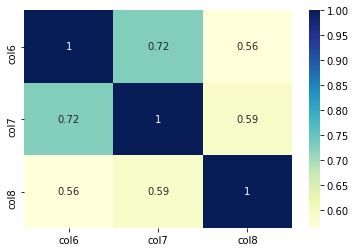

In [9]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_control_a.corr(), cmap="YlGnBu", annot=True)  
# displaying heatmap
plt.show()

In [10]:
for col in df_control_f.columns:
    print(column_names[col])

molesto(a)
hostil
alerta
avergonzado(a)
inspirado(a)
nervioso(a)
determinado(a)
atento(a)
asustado(a)
activo(a)


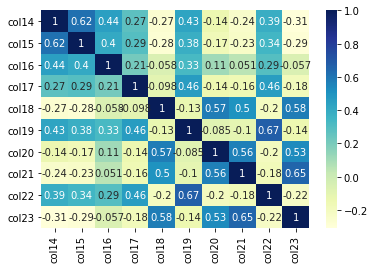

In [11]:
sns.heatmap(df_control_f.corr(), cmap="YlGnBu", annot=True) 
plt.show()

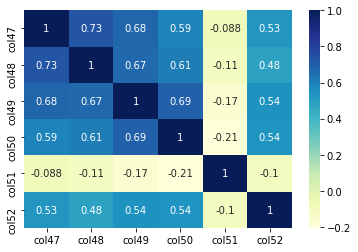

In [12]:
sns.heatmap(df_x_c.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [13]:
df_demographic_2

,col24,col25,col26
0,10°,Ingeniería Civil Industrial,Gestión de Activos
1,8°,Ingeniería Civil Industrial,Administracion de la Producción I
2,10°,Ingeniería Civil Industrial,Gestión de la Innovación
3,9°,Ingeniería Civil Industrial,Procesos Mineros
4,10°,Ingeniería Civil Industrial,Capstone Project
...,...,...,...
315,6°,Ingeniería Civil Industrial,Estadística Aplicada
316,5°,Ingeniería Civil Industrial,Investigación Operativa I
317,5°,Ingeniería Civil Industrial,Confiabilidad
318,12°,Ingeniería Civil Industrial,Evaluacion De Proyectos


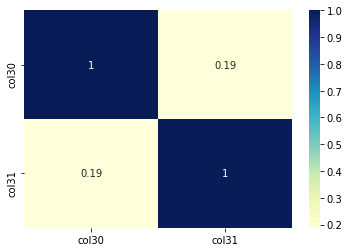

In [14]:
sns.heatmap(df_control_g.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [15]:
df_control_g

,col30,col31
0,4,1
1,4,2
2,4,4
3,5,4
4,4,2
...,...,...
315,2,4
316,5,5
317,5,4
318,5,5
